In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
sns.set_style("whitegrid")

## Scenario C

In [26]:
# read the Scenario_C.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
df_hh = pd.read_excel('Scenario_C.xlsx', sheet_name='HH')
df_ha = pd.read_excel('Scenario_C.xlsx', sheet_name='HA')
df_ah = pd.read_excel('Scenario_C.xlsx', sheet_name='AH')
df_aa = pd.read_excel('Scenario_C.xlsx', sheet_name='AA')

In [27]:
# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
df_hh['Configuration'] = 'HH'
df_ha['Configuration'] = 'HA'
df_ah['Configuration'] = 'AH'
df_aa['Configuration'] = 'AA'
df = pd.concat([df_hh, df_ha, df_ah, df_aa], ignore_index=True)

In [28]:
# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df['Lead_Pilot'] = df['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})

In [29]:
def role_avg(df, metric_base: str, role: str, cm_range=range(1, 6)):    
    cols_time = [f'CM{i}_{metric_base}' for i in cm_range]
    cols_role = [f'CM{i}_Interceptor Role' for i in cm_range]
    masked_times = [
        df[time_col].where(df[role_col] == role)
        for time_col, role_col in zip(cols_time, cols_role)
    ]
    return pd.concat(masked_times, axis=1).mean(axis=1, skipna=True)

In [30]:
# get the average 'CM{i}_MOP_Time_to_Intercept_s' for i = 1, ..., 5 and add to a new column 'Avg_Time_to_Intercept_s'
for i in range(1, 6):
    df[f'CM{i}_'] = df[f'CM{i}_Heading_Diff_at_Intercept_deg'] - df[f'CM{i}_Heading_Diff_at_Intercept_deg']
df['Avg_Time_to_Intercept_s'] = df[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Time_to_Intercept_s'] = role_avg(df, 'MOP_Time_to_Intercept_s', 'Lead')
df['Wing_Avg_Time_to_Intercept_s'] = role_avg(df, 'MOP_Time_to_Intercept_s', 'Wingman')
df['Avg_Time_to_Consent_s'] = df[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Time_to_Consent_s'] = role_avg(df, 'MOP_Time_to_Consent_s', 'Lead')
df['Wing_Avg_Time_to_Consent_s'] = role_avg(df, 'MOP_Time_to_Consent_s', 'Wingman')
df['Avg_Airspeed_Diff_at_Intercept_kt'] = df[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Airspeed_Diff_at_Intercept_kt'] = role_avg(df, 'Airspeed_Diff_at_Intercept_kt', 'Lead')
df['Wing_Avg_Airspeed_Diff_at_Intercept_kt'] = role_avg(df, 'Airspeed_Diff_at_Intercept_kt', 'Wingman')
df['Avg_Heading_Diff_at_Intercept_deg'] = df[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Heading_Diff_at_Intercept_deg'] = role_avg(df, 'Heading_Diff_at_Intercept_deg', 'Lead')
df['Wing_Avg_Heading_Diff_at_Intercept_deg'] = role_avg(df, 'Heading_Diff_at_Intercept_deg', 'Wingman')
df['Avg_Altitude_Offset_at_Intercept_ft'] = df[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Altitude_Offset_at_Intercept_ft'] = role_avg(df, 'Altitude_Offset_at_Intercept_ft', 'Lead')
df['Wing_Avg_Altitude_Offset_at_Intercept_ft'] = role_avg(df, 'Altitude_Offset_at_Intercept_ft', 'Wingman')
df['Avg_Distance_from_CM_at_Intercept_nm'] = df[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df['Lead_Avg_Distance_from_CM_at_Intercept_nm'] = role_avg(df, 'Distance_from_CM_at_Intercept_nm', 'Lead')
df['Wing_Avg_Distance_from_CM_at_Intercept_nm'] = role_avg(df, 'Distance_from_CM_at_Intercept_nm', 'Wingman')
df['Avg_Aspect_at_MELD_Range_deg'] = df[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df['Proportion_Intercepted_by_Lead'] = df[[f'CM{i}_Interceptor Role' for i in range(1, 6)]].apply(lambda x: sum(x == 'Lead') / len(x), axis=1)
df['Correct_Acquisition'] = df['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)
df.loc[df['Avg_Airspeed_Diff_at_Intercept_kt'] < 0, 'Avg_Airspeed_Diff_at_Intercept_kt'] = np.nan
df['Percent_CMs_Intercepted'] = df['Proportion_CMs_Intercepted'] * 100
df['Percent_SAMs_Identified'] = df['Proportion_SAMs_Identified'] * 100


In [31]:
mop_list = ['Proportion_SAMs_Identified', 'Avg_SAM_ID_Time_s', 'Lead_Altitude_Deviation_Count', 'Wingman_Altitude_Deviation_Count',
            'Lead_Altitude_Deviation_Integrated_ft_s', 'Wingman_Altitude_Deviation_Integrated_ft_s', 'Proportion_CMs_Intercepted',
            'Avg_Time_to_Intercept_s', 'Avg_Time_to_Consent_s', 'Avg_Airspeed_Diff_at_Intercept_kt', 'Avg_Heading_Diff_at_Intercept_deg',
            'Avg_Altitude_Offset_at_Intercept_ft', 'Avg_Distance_from_CM_at_Intercept_nm', 'Avg_Aspect_at_MELD_Range_deg',
            'Num_Tactical_Comms', 'Correct_Acquisition', 'Scenario_Duration_s', 'Proportion_Intercepted_by_Lead', 'Percent_CMs_Intercepted', 'Percent_SAMs_Identified',
            'Lead_Avg_Time_to_Intercept_s', 'Wing_Avg_Time_to_Intercept_s', 'Lead_Avg_Time_to_Consent_s', 'Wing_Avg_Time_to_Consent_s',
            'Lead_Avg_Airspeed_Diff_at_Intercept_kt', 'Wing_Avg_Airspeed_Diff_at_Intercept_kt', 'Lead_Avg_Heading_Diff_at_Intercept_deg',
            'Wing_Avg_Heading_Diff_at_Intercept_deg', 'Lead_Avg_Altitude_Offset_at_Intercept_ft', 'Wing_Avg_Altitude_Offset_at_Intercept_ft',]

In [34]:
plot_title_dic = {'Proportion_SAMs_Identified': 'Proportion of Surface Threats Identified', 'Avg_SAM_ID_Time_s': 'Average Surface Threat ID Time (s)',
                  'Lead_Altitude_Deviation_Count': 'Lead Altitude Deviation Count', 'Wingman_Altitude_Deviation_Count': 'Wingman Altitude Deviation Count',
                  'Lead_Altitude_Deviation_Integrated_ft_s': 'Lead Altitude Deviation Integrated (ft·s)', 'Wingman_Altitude_Deviation_Integrated_ft_s': 'Wingman Altitude Deviation Integrated (ft·s)',
                    'Proportion_CMs_Intercepted': 'Proportion of CMs Intercepted', 'Avg_Time_to_Intercept_s': 'Average Time to Intercept (s)',
                    'Avg_Time_to_Consent_s': 'Average Time to Consent (s)', 'Avg_Airspeed_Diff_at_Intercept_kt': 'Average Airspeed Difference at Intercept (kt)',
                    'Avg_Heading_Diff_at_Intercept_deg': 'Average Heading Difference at Intercept (deg)', 'Avg_Altitude_Offset_at_Intercept_ft': 'Average Altitude Offset at Intercept (ft)',
                    'Avg_Distance_from_CM_at_Intercept_nm': 'Average Distance from CM at Intercept (nm)', 'Avg_Aspect_at_MELD_Range_deg': 'Average Aspect at MELD Range (deg)',
                    'Num_Tactical_Comms': 'Update Score', 'Correct_Acquisition': 'Correct Target Acquisi}tion', 'Scenario_Duration_s': 'Scenario Duration (s)',
                    'Proportion_Intercepted_by_Lead': 'Proportion of CMs Intercepted by Lead', 'Percent_CMs_Intercepted': 'Percent of CMs Intercepted (%)', 'Percent_SAMs_Identified': 'Percent of Surface Threats Identified (%)',
                    'Lead_Avg_Time_to_Intercept_s': 'Lead Average Time to Intercept (s)', 'Wing_Avg_Time_to_Intercept_s': 'Wingman Average Time to Intercept (s)',
                    'Lead_Avg_Time_to_Consent_s': 'Lead Average Time to Consent (s)', 'Wing_Avg_Time_to_Consent_s': 'Wingman Average Time to Consent (s)',
                    'Lead_Avg_Airspeed_Diff_at_Intercept_kt': 'Lead Average Airspeed Difference at Intercept (kt)', 'Wing_Avg_Airspeed_Diff_at_Intercept_kt': 'Wingman Average Airspeed Difference at Intercept (kt)',
                    'Lead_Avg_Heading_Diff_at_Intercept_deg': 'Lead Average Heading Difference at Intercept (deg)', 'Wing_Avg_Heading_Diff_at_Intercept_deg': 'Wingman Average Heading Difference at Intercept (deg)',
                    'Lead_Avg_Altitude_Offset_at_Intercept_ft': 'Lead Average Altitude Offset at Intercept (ft)', 'Wing_Avg_Altitude_Offset_at_Intercept_ft': 'Wingman Average Altitude Offset at Intercept (ft)',
                    'Lead_Avg_Distance_from_CM_at_Intercept_nm': 'Lead Average Distance from CM at Intercept (nm)', 'Wing_Avg_Distance_from_CM_at_Intercept_nm': 'Wingman Average Distance from CM at Intercept (nm)'}

In [35]:
all_pilots = sorted(set(df['Lead_Pilot']))

markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
colors = cm.get_cmap('tab10', len(all_pilots)).colors

pilot_styles = {
    pilot: {'marker': markers[i % len(markers)],
            'color': colors[i % len(colors)]}
    for i, pilot in enumerate(all_pilots)
}

In [36]:
def plot_mops(df, mop, scenario, pilot_styles):
    col = mop
    if scenario == 'C':
        configs = ['HH', 'HA', 'AH', 'AA']
    elif scenario == 'D':
        configs = ['HA', 'AA']
    plt.figure(figsize=(10, 6))

    # Boxplot
    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    data_for_box = [
        df.loc[df['Configuration'] == c, col].dropna() 
        if df.loc[df['Configuration'] == c, col].dropna().size > 0 
        else [np.nan]
        for c in configs
]
    plt.boxplot(data_for_box, labels=configs, boxprops=boxprops, medianprops=medianprops, showfliers=False)
    # plt.boxplot(
    #     [df[df['Configuration'] == c][col] for c in configs],
    #     labels=configs, boxprops=boxprops, medianprops=medianprops
    # )

    # --- Assign markers and colors per pilot ---
    # unique_pilots = sorted(df['Lead_Pilot'].unique())
    # markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
    # colors = cm.get_cmap('tab10', len(unique_pilots)).colors  # or use 'tab20'

    # pilot_styles = {
    #     pilot: {'marker': markers[i % len(markers)],
    #             'color': colors[i % len(colors)]}
    #     for i, pilot in enumerate(unique_pilots)
    # }

    # --- Scatter raw points with jitter ---
    for i, config in enumerate(configs, start=1):
        subset = df[df['Configuration'] == config]
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                label=pilot if i == 1 else None,  # only add to legend once
                marker=style['marker'],
                color=style['color'],
                edgecolor='black'
            )

    # col_label = col.replace('_', ' ')
    col_label = plot_title_dic[col]
    # plt.title(f'{col_label} by Configuration')
    # plt.title(f'Scenario {scenario}\n{col_label} by Configuration')
    plt.ylabel(f'{col_label}')
    plt.xlabel('Configuration')
    plt.grid(axis='y')

    # if 'proportion' is in the column name, set y limit to 0 to 1
    if 'Proportion' in col:
        plt.ylim(0, 1.05)

    if 'Percent' in col:
        plt.ylim(0, 105)
        
    # Unique legend for pilots
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Pilot',
               bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    # plt.show()
    plt.savefig(f'Scenario {scenario}/Plots NOTITLES/{col_label}.jpg', dpi=700)
    plt.close()

In [37]:
def create_data_summary(df, scenario):
    summary = df.groupby('Configuration')[mop_list].agg(['mean', 'std']).reset_index()
    # Flatten MultiIndex columns
    summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary.columns.values]
    summary.to_csv(f'Scenario {scenario}/Data_Summary.csv', index=False)

In [38]:
create_data_summary(df, 'C')

In [39]:
for mop in mop_list:
    plot_mops(df, mop, 'C', pilot_styles=pilot_styles)

## Scenario D

In [42]:
# next, do the same with scenario D
# read the Scenario_D.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
# df_d_hh = pd.read_excel('Scenario_D.xlsx', sheet_name='HH')
df_d_ha = pd.read_excel('Scenario_D.xlsx', sheet_name='HA')
# df_d_ah = pd.read_excel('Scenario_D.xlsx', sheet_name='AH')
df_d_aa = pd.read_excel('Scenario_D.xlsx', sheet_name='AA')

# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
# df_d_hh['Configuration'] = 'HH'
df_d_ha['Configuration'] = 'HA'
# df_d_ah['Configuration'] = 'AH'
df_d_aa['Configuration'] = 'AA'
df_d = pd.concat([df_d_ha, df_d_aa], ignore_index=True)

# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df_d['Lead_Pilot'] = df_d['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7',})

In [43]:
df_d[f'CM{i}_Heading_Diff_at_Intercept_deg'] = df_d[f'CM{i}_Heading_Diff_at_Intercept_deg'].abs()
df_d['Avg_Time_to_Intercept_s'] = df_d[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Time_to_Intercept_s'] = role_avg(df_d, 'MOP_Time_to_Intercept_s', 'Lead')
df_d['Wing_Avg_Time_to_Intercept_s'] = role_avg(df_d, 'MOP_Time_to_Intercept_s', 'Wingman')
df_d['Avg_Time_to_Consent_s'] = df_d[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Time_to_Consent_s'] = role_avg(df_d, 'MOP_Time_to_Consent_s', 'Lead')
df_d['Wing_Avg_Time_to_Consent_s'] = role_avg(df_d, 'MOP_Time_to_Consent_s', 'Wingman')
df_d['Avg_Airspeed_Diff_at_Intercept_kt'] = df_d[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Airspeed_Diff_at_Intercept_kt'] = role_avg(df_d, 'Airspeed_Diff_at_Intercept_kt', 'Lead')
df_d['Wing_Avg_Airspeed_Diff_at_Intercept_kt'] = role_avg(df_d, 'Airspeed_Diff_at_Intercept_kt', 'Wingman')
df_d['Avg_Heading_Diff_at_Intercept_deg'] = df_d[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Heading_Diff_at_Intercept_deg'] = role_avg(df_d, 'Heading_Diff_at_Intercept_deg', 'Lead')
df_d['Wing_Avg_Heading_Diff_at_Intercept_deg'] = role_avg(df_d, 'Heading_Diff_at_Intercept_deg', 'Wingman')
df_d['Avg_Altitude_Offset_at_Intercept_ft'] = df_d[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Altitude_Offset_at_Intercept_ft'] = role_avg(df_d, 'Altitude_Offset_at_Intercept_ft', 'Lead')
df_d['Wing_Avg_Altitude_Offset_at_Intercept_ft'] = role_avg(df_d, 'Altitude_Offset_at_Intercept_ft', 'Wingman')
df_d['Avg_Distance_from_CM_at_Intercept_nm'] = df_d[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df_d['Lead_Avg_Distance_from_CM_at_Intercept_nm'] = role_avg(df_d, 'Distance_from_CM_at_Intercept_nm', 'Lead')
df_d['Wing_Avg_Distance_from_CM_at_Intercept_nm'] = role_avg(df_d, 'Distance_from_CM_at_Intercept_nm', 'Wingman')
df_d['Avg_Aspect_at_MELD_Range_deg'] = df_d[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Proportion_Intercepted_by_Lead'] = df_d[[f'CM{i}_Interceptor Role' for i in range(1, 6)]].apply(lambda x: sum(x == 'Lead') / len(x), axis=1)
df_d['Correct_Acquisition'] = df_d['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)
df_d.loc[df_d['Avg_Airspeed_Diff_at_Intercept_kt'] < 0, 'Avg_Airspeed_Diff_at_Intercept_kt'] = np.nan
df_d['Percent_CMs_Intercepted'] = df_d['Proportion_CMs_Intercepted'] * 100
df_d['Percent_SAMs_Identified'] = df_d['Proportion_SAMs_Identified'] * 100

In [44]:
create_data_summary(df_d, 'D')

In [45]:
for mop in mop_list:
    plot_mops(df_d, mop, 'D', pilot_styles=pilot_styles)    

## Bedford

In [53]:
bedford = pd.read_excel('Bedford Results.xlsx')

In [54]:
bedford['Lead_Pilot'] = bedford['Lead'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7'})

In [55]:
bedford = bedford.drop_duplicates(subset=['Configuration', 'Scenario', 'Lead_Pilot'])

In [56]:
def plot_bedford(df, scenario, pilot_styles):
    col = 'Bedford'
    configs = ['HH', 'HA', 'AH', 'AA']
    df_scenario = df[df['Scenario'] == scenario].copy()
    if scenario == 'D':
        configs = ['HA', 'AA']

    plt.figure(figsize=(10, 6))

    # --- Boxplot data, dropping NaNs and skipping empty sets ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df_scenario.loc[df_scenario['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops, showfliers=False)

    # --- Overlay raw data with consistent pilot styling ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df_scenario[df_scenario['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
               label=pilot if i == 1 else None  # only once for legend
            )

    # --- Titles, labels, legend ---
    # plt.title(f'{col} Workload Rating by Configuration\nScenario {scenario}',
    #           fontsize=14, pad=10)
    plt.ylabel('Bedford Score')
    plt.xlabel('Configuration')
    plt.grid(axis='y')
    # make the y-ticks go from 1 to 10
    plt.yticks(range(1, 11))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    plt.show()
    # plt.savefig(f'Workload/Plots NOTITLES/{col}_Scenario_{scenario}.jpg', dpi=700)
    plt.close()

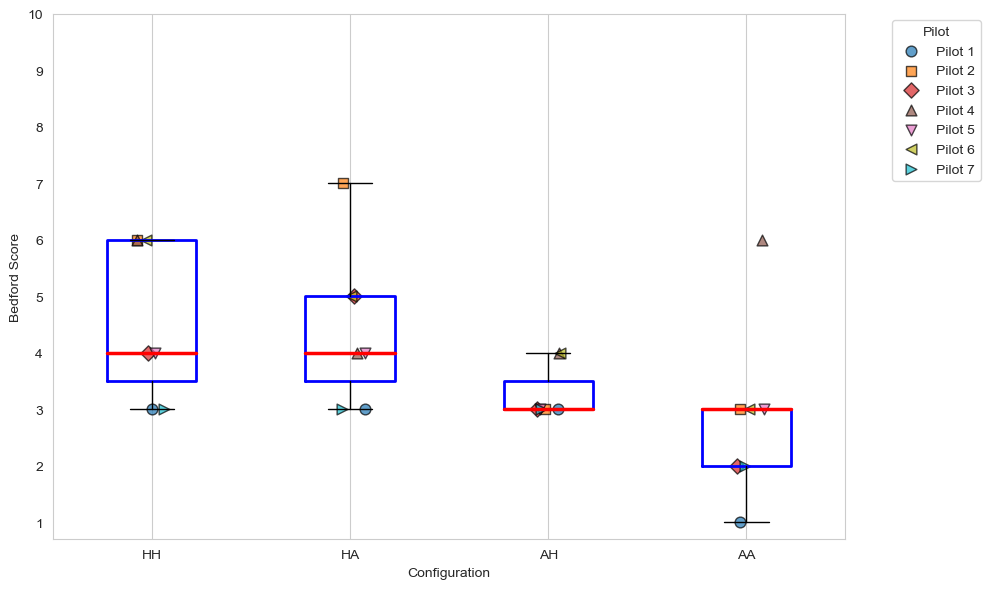

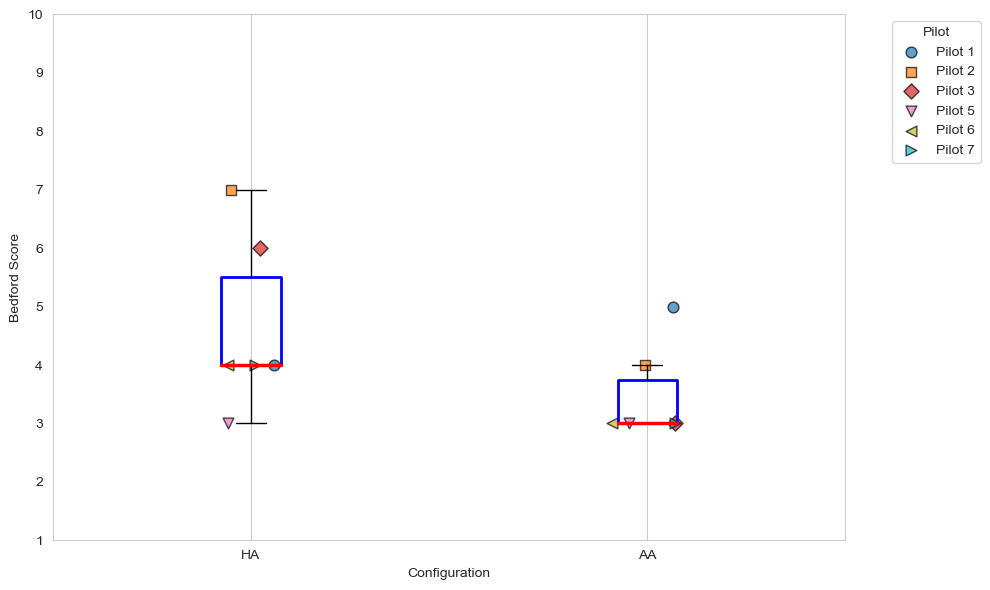

In [57]:
plot_bedford(bedford, 'C', pilot_styles)
plot_bedford(bedford, 'D', pilot_styles)

## Overall Scores

In [58]:
df_hh_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='HH')
df_hh_overall_c['Configuration'] = 'HH'
df_ha_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='HA')
df_ha_overall_c['Configuration'] = 'HA'
df_ah_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='AH')
df_ah_overall_c['Configuration'] = 'AH'
df_aa_overall_c = pd.read_excel('SCORES_Scenario_C_Summary.xlsx', sheet_name='AA')
df_aa_overall_c['Configuration'] = 'AA'

In [59]:
df_ha_overall_d = pd.read_excel('SCORES_Scenario_D_Summary.xlsx', sheet_name='HA')
df_ha_overall_d['Configuration'] = 'HA'
df_aa_overall_d = pd.read_excel('SCORES_Scenario_D_Summary.xlsx', sheet_name='AA')
df_aa_overall_d['Configuration'] = 'AA'

In [60]:
df_overall_c = pd.concat([df_hh_overall_c, df_ha_overall_c, df_ah_overall_c, df_aa_overall_c], ignore_index=True)
df_overall_d = pd.concat([df_ha_overall_d, df_aa_overall_d], ignore_index=True)

In [61]:
# remove the row where 'Configuration' == 'HA', 'Lead_Pilot' == 'Grimmer'
df_overall_c = df_overall_c[~((df_overall_c['Configuration'] == 'HA') & (df_overall_c['Lead_Pilot'] == 'Grimmer'))]

In [62]:
df_overall_c['Lead_Pilot'] = df_overall_c['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})
df_overall_d['Lead_Pilot'] = df_overall_d['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7'})

In [63]:
def plot_overall_metric(df, col, scenario, pilot_styles):

    configs = ['HH', 'HA', 'AH', 'AA']
    plt.figure(figsize=(10, 6))
    if scenario == 'D':
        configs = ['HA', 'AA']

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col} (Scenario {scenario}). Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops, showfliers=False)

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    col_label = col.replace('_', ' ')
    # plt.title(f'{col_label} by Configuration\nScenario {scenario}',
    #           fontsize=14, pad=10)
    plt.ylabel(col_label)
    plt.xlabel('Configuration')
    plt.grid(axis='y')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    # plt.show()
    plt.savefig(f'Scenario C/{col}_Scenario_{scenario} NOTITLE.jpg', dpi=700)
    plt.close()

In [64]:
plot_overall_metric(df_overall_c, 'Overall Score', 'C', pilot_styles)

In [65]:
plot_overall_metric(df_overall_d, 'Overall Score', 'D', pilot_styles)
# d is pretty messed up ... 

## SART

In [66]:
sart_df = pd.read_excel('SART with averages and rounding.xlsx')
sart_df['Lead_Pilot'] = sart_df['Name'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Fleischmann': 'Pilot 6', 'Smith': 'Pilot 7', 'Mach': 'Pilot 4'})

In [67]:
sart_col = 'SART'
demand_col = 'Demand (Rounded)'
supply_col = 'Supply (Rounded)'
understanding_col = 'Understanding (Rounded)'

In [68]:
# define a function that plots one of the sart columns using the same scheme and pilot styles as before
def plot_sart_metric(df, col, pilot_styles):
    configs = ['HH', 'HA', 'AH', 'AA']
    plt.figure(figsize=(10, 6))

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col}. Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    # means = [np.mean(data) for data in data_for_box]
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops, showfliers=False)
    # add the outlier signal to the legend

    
    # also include the mean as a black  line with label 'Mean'
    # for i, mean in enumerate(means, start=1):
    #     plt.plot([i - 0.2, i + 0.2], [mean, mean], color='black', linewidth=2, label='Mean' if i == 1 else "")

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    if col == sart_col:
        col_label = 'SART Score'
    if col == demand_col:
        col_label = 'SART Demand Score'
    if col == supply_col:
        col_label = 'SART Supply Score'
    if col == understanding_col:
        col_label = 'SART Understanding Score'
    # plt.title(f'Scenario C\n{col_label} by Configuration',
    #           fontsize=14, pad=10)
    plt.ylabel(col_label)
    plt.xlabel('Configuration')
    plt.grid(axis='y')
    # make the y-ticks go from 1 to 7
    plt.yticks(range(1, 8))

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # --- Save plot ---
    plt.show()
    # plt.savefig(f'Situational Awareness/Plots NOTITLES/{col}.jpg', dpi=700)

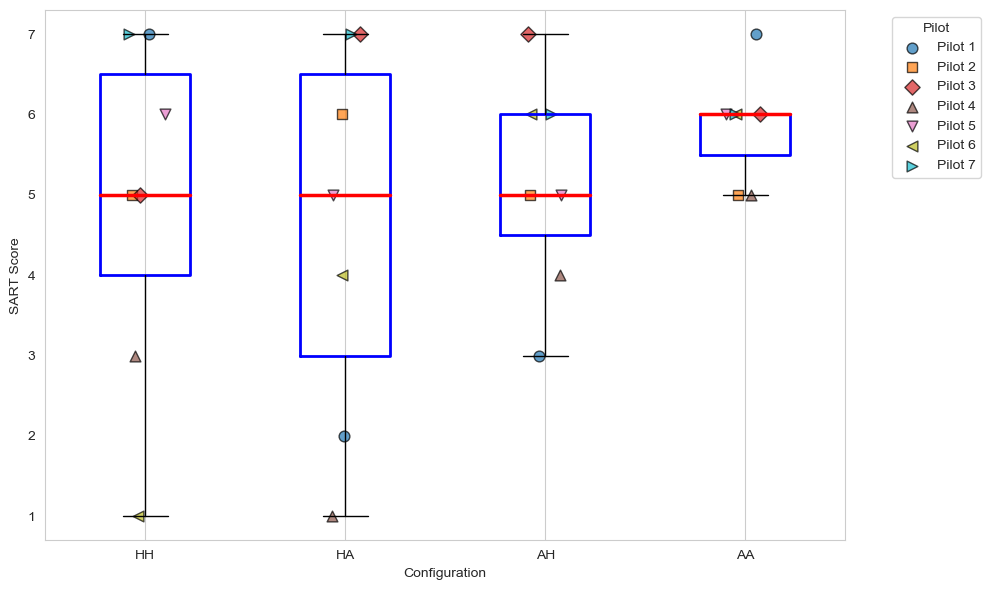

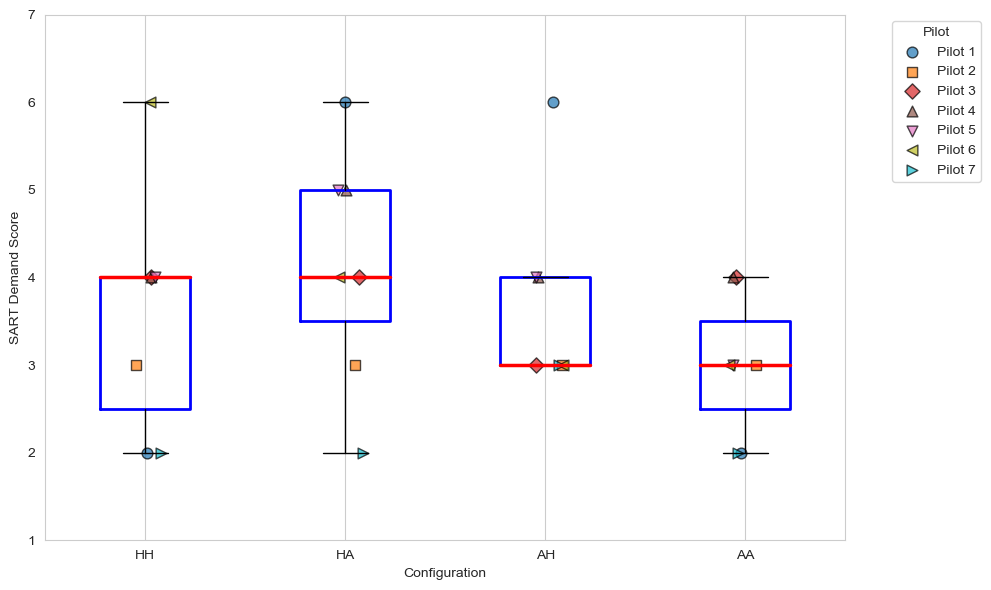

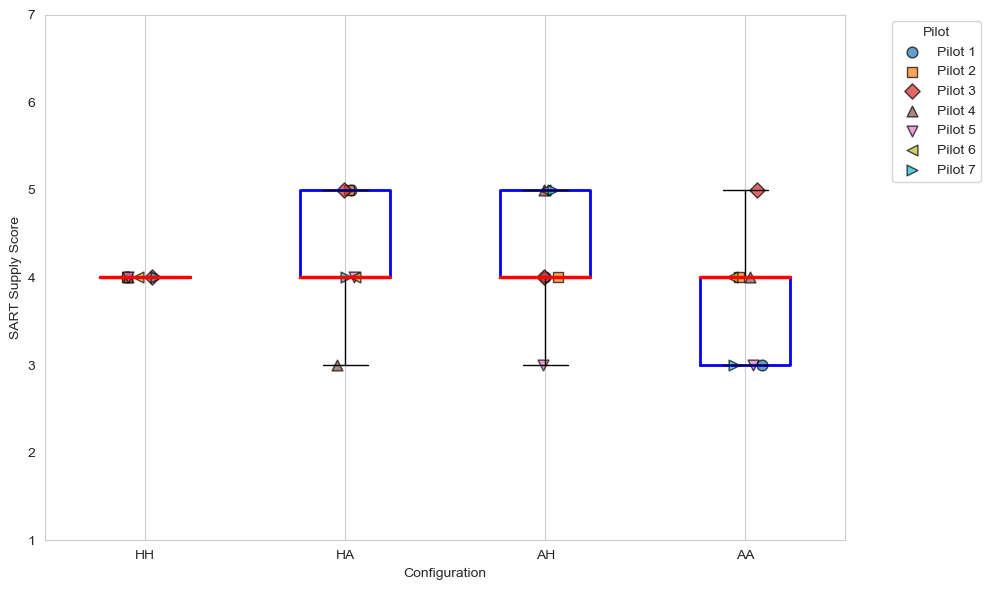

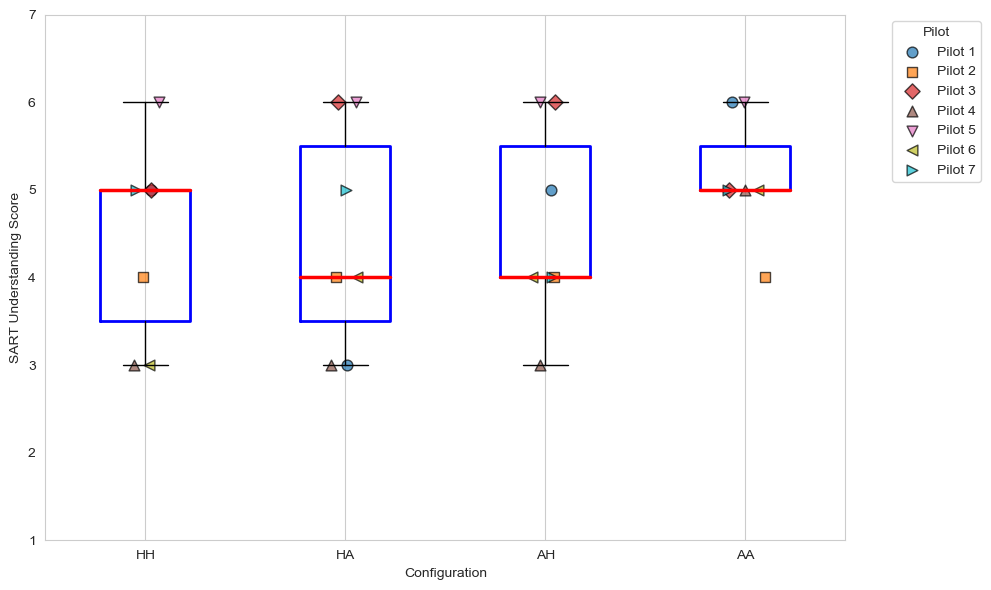

In [69]:
plot_sart_metric(sart_df, sart_col, pilot_styles)
plot_sart_metric(sart_df, demand_col, pilot_styles)
plot_sart_metric(sart_df, supply_col, pilot_styles)
plot_sart_metric(sart_df, understanding_col, pilot_styles)

In [70]:
# for each of the sart columns, create a data summary csv grouped by configuration and report the mean and std
def create_sart_data_summary(df):
    summary = df.groupby('Configuration')[[sart_col, demand_col, supply_col, understanding_col]].agg(['mean', 'std']).reset_index()
    # Flatten MultiIndex columns
    summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary.columns.values]
    summary.to_csv('Situational Awareness/SART_Data_Summary.csv', index=False)
create_sart_data_summary(sart_df)

## SART vs Performance

In [72]:
df_overall_c.columns

Index(['Lead_Pilot', 'Relative Distance (Terminal Conditions)',
       'Relative Altitude (Terminal Conditions)',
       'Closing Velocity (Terminal Conditions)',
       'Heading Crossing Angle (Terminal Conditions)', 'Terminal Condition',
       'Time to Intercept', 'Time to Consent', 'Time Efficiency',
       'Percent SAM ID', 'Time to SAM ID', 'SAM Identification',
       'Altitude Deviation', 'Correct Sort', 'Communication Density',
       'Percent Intercepted', 'Engagement-Wide Measures', 'Overall Score',
       'Demand (Unrounded)', 'Supply (Unrounded)', 'Understanding (Unrounded)',
       'SART (Rounded After)', 'SART_demand', 'SART_supply',
       'SART_understanding', 'SART_overall', 'Bedford', 'Trust',
       'Configuration'],
      dtype='object')

In [91]:
# plot 'Overall Score' against 'Bedford' for scenario C, both are in df_overall_c, make the points for each pilot follow pilot_styles
def plot_overall_vs_bedford(df, pilot_styles):
    plt.figure(figsize=(10, 6))

    for pilot, pilot_df in df.groupby('Lead_Pilot'):
        if pilot not in pilot_styles:
            continue
        style = pilot_styles[pilot]
        plt.scatter(
            pilot_df['Overall Score'],
            pilot_df['Bedford'],
            alpha=0.7,
            s=80,
            marker=style['marker'],
            color=style['color'],
            edgecolor='black',
            label=pilot
        )
    
    # fit a linear regression line to the data
    m, b = np.polyfit(df['Overall Score'], df['Bedford'], 1)
    slope = m
    p_value = np.corrcoef(df['Overall Score'], df['Bedford'])[0, 1]
    plt.plot(df['Overall Score'], m * df['Overall Score'] + b, color='red', linestyle='--', label='Fit Line')


    plt.xlabel('Overall Score')
    plt.ylabel('Bedford Score')
    # plt.title('Overall Score vs Bedford Score\nScenario C', fontsize=14, pad=10)
    plt.grid()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    # make the y axis go from 1 to 10
    plt.ylim(0, 10)
    # plt.show()
    plt.savefig('Scenario C/Overall_vs_Bedford_Scenario_C.jpg', dpi=700)
    plt.close()

In [92]:
plot_overall_vs_bedford(df_overall_c, pilot_styles)

In [93]:
# do the same for 'Overall Score' and 'SART_overall'
def plot_overall_vs_sart(df, sart_df, pilot_styles):
    merged_df = pd.merge(df, sart_df[['Configuration', 'Lead_Pilot', 'SART']], on=['Configuration', 'Lead_Pilot'])
    plt.figure(figsize=(10, 6))

    for pilot, pilot_df in merged_df.groupby('Lead_Pilot'):
        if pilot not in pilot_styles:
            continue
        style = pilot_styles[pilot]
        plt.scatter(
            pilot_df['Overall Score'],
            pilot_df['SART'],
            alpha=0.7,
            s=80,
            marker=style['marker'],
            color=style['color'],
            edgecolor='black',
            label=pilot
        )
    
    # fit a linear regression line to the data
    m, b = np.polyfit(merged_df['Overall Score'], merged_df['SART'], 1)
    slope = m
    p_value = np.corrcoef(merged_df['Overall Score'], merged_df['SART'])[0, 1]
    plt.plot(merged_df['Overall Score'], m * merged_df['Overall Score'] + b, color='red', linestyle='--', label='Fit Line')


    plt.xlabel('Overall Score')
    plt.ylabel('SART Score')
    # plt.title('Overall Score vs SART Score\nScenario C', fontsize=14, pad=10)
    plt.grid()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.ylim(0, 8)
    # plt.show()
    plt.savefig('Scenario C/Overall_vs_SART_Scenario_C.jpg', dpi=700)
    plt.close()
plot_overall_vs_sart(df_overall_c, sart_df, pilot_styles)

## Trust

In [94]:
consolidated_df = pd.read_excel('Consolidated Data Collection Sheet.xlsx', sheet_name='SART')

In [95]:
# remove the first row from the dataframe
consolidated_df = consolidated_df.iloc[1:]
trust_df = consolidated_df[['Name', 'Test Point', 'Configuration', f'Trust (0-100%)']]

In [96]:
trust_df['Lead_Pilot'] = trust_df['Name'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7', 'Mach': 'Pilot 4'})

/var/folders/6k/39pgnfs54wn25kbnd913q5wr0000gn/T/ipykernel_71111/4218675892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust_df['Lead_Pilot'] = trust_df['Name'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Pig': 'Pilot 6', 'Assassin': 'Pilot 7', 'Mach': 'Pilot 4'})


In [97]:
trust_df = trust_df.drop_duplicates(subset=['Lead_Pilot', 'Test Point', 'Configuration'])

In [98]:
trust_df_c = trust_df[trust_df['Test Point']=='C']
trust_df_d = trust_df[trust_df['Test Point']=='D']

In [99]:
# define a function that plots trust using the same scheme and pilot styles as before
def plot_trust_metric(df, scenario, pilot_styles):
    col = f'Trust (0-100%)'
    configs = ['HH', 'HA', 'AH', 'AA'] if scenario == 'C' else ['HA', 'AA']
    plt.figure(figsize=(10, 6))

    # --- Boxplot data ---
    data_for_box = []
    valid_configs = []
    for c in configs:
        subset = df.loc[df['Configuration'] == c, col].dropna()
        if len(subset) > 0:
            data_for_box.append(subset)
            valid_configs.append(c)

    if not valid_configs:
        print(f"⚠️ No valid data found for {col} (Scenario {scenario}). Skipping plot.")
        return

    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(data_for_box, labels=valid_configs,
                boxprops=boxprops, medianprops=medianprops, showfliers=False)

    # --- Overlay raw data with consistent pilot colors/markers ---
    for i, config in enumerate(valid_configs, start=1):
        subset = df[df['Configuration'] == config].dropna(subset=[col])
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            if pilot not in pilot_styles:
                continue
            style = pilot_styles[pilot]
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                marker=style['marker'],
                color=style['color'],
                edgecolor='black',
                label=pilot if i == 1 else None
            )

    # --- Titles, labels, legend ---
    # plt.title(f'Scenario {scenario}\nTrust (%) by Configuration',
    #           fontsize=14, pad=10)
    plt.ylabel('Trust (%)')
    plt.xlabel('Configuration')
    plt.ylim(0, 105)
    plt.grid(axis='y')

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               title='Pilot', bbox_to_anchor=(1.05, 1 ), loc='upper left')
    plt.tight_layout()
    # --- Save plot ---
    plt.show()
    # plt.savefig(f'Trust/Plots NOTITLES/Trust_Scenario_{scenario}.jpg', dpi=700)
    plt.close()

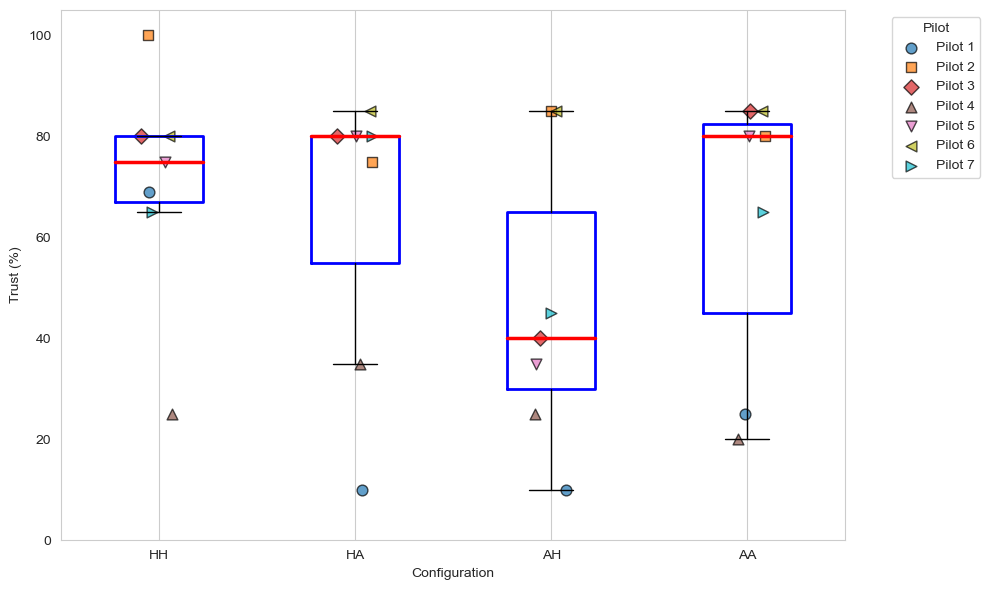

In [100]:
plot_trust_metric(trust_df_c, 'C', pilot_styles)

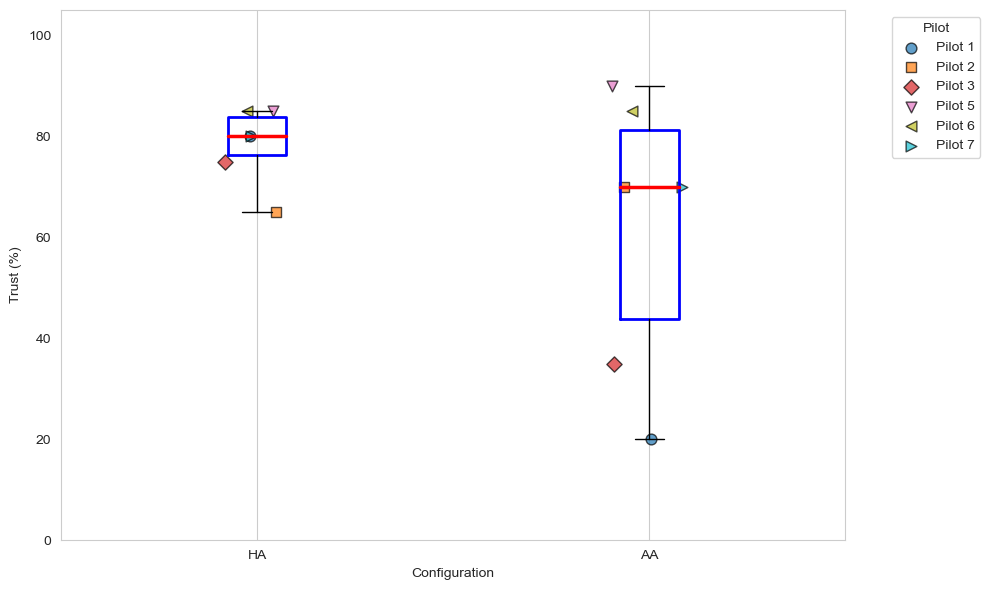

In [101]:
plot_trust_metric(trust_df_d, 'D', pilot_styles)

## Altitude Deviation

Should be Tars AA, scenario C